In [101]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [102]:
#read the csv file and convert to a dataframe
file_path = 'house_sales.csv'
house_sales_df = pd.read_csv(file_path)

In [103]:
print(house_sales_df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0   

In [104]:
#descriptive statistics for the dataframe
house_sales_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [105]:
shape = house_sales_df.shape
print(shape)

(21613, 21)


In [106]:
#identifying missing values 
house_sales_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [107]:
#replace null values of `bedrooms` with the mean of the `bedrooms` column
mean_bed=house_sales_df['bedrooms'].mean()
house_sales_df['bedrooms'].replace(np.nan,mean_bed, inplace=True)

#replace null values of `bathrooms` with the mean of the `bathrooms` column
mean_bath=house_sales_df['bathrooms'].mean()
house_sales_df['bathrooms'].replace(np.nan,mean_bath, inplace=True)

#replace null values of `sqft_living` with the values of `sqft_living15` column
house_sales_df['sqft_living'].fillna(house_sales_df['sqft_living15'], inplace=True)

#replace null values of `sqft_lot` with the values of `sqft_lot15` column
house_sales_df['sqft_lot'].fillna(house_sales_df['sqft_lot15'], inplace=True)

In [108]:
#checking for any remaining missing values 
house_sales_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [109]:
#updated the data to the csv for ease in future work
house_sales_df.to_csv("housesales.csv", index=False)

#updated dataframe name
file_path = 'housesales.csv'
housesales_df = pd.read_csv(file_path)

print(housesales_df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0       1.00   
1      6414100192  20141209T000000  538000.0       3.0       2.25   
2      5631500400  20150225T000000  180000.0       2.0       1.00   
3      2487200875  20141209T000000  604000.0       4.0       3.00   
4      1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0           1180.0    5650.0     1.0           0     0  ...      7   
1           2570.0    7242.0   

In [110]:
#removed the string attached to the end of the dates
housesales_df['date'] = housesales_df['date'].str.replace('T000000', '', regex=True)

In [111]:
#convert the date to datetime format 
housesales_df['date'] = pd.to_datetime(housesales_df['date'])
housesales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [112]:
#removed the id column as it does not contribute to the dataset
housesales_df.drop('id', axis=1, inplace=True)

In [113]:
#removing redundant data as there are two sqft_living and sqft_lot
housesales_df.drop("sqft_living15", axis = 1, inplace=True)
housesales_df.drop("sqft_lot15", axis = 1, inplace=True)

In [114]:
print(housesales_df)

            date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0       3.0       1.00       1180.0    5650.0   
1     2014-12-09  538000.0       3.0       2.25       2570.0    7242.0   
2     2015-02-25  180000.0       2.0       1.00        770.0   10000.0   
3     2014-12-09  604000.0       4.0       3.00       1960.0    5000.0   
4     2015-02-18  510000.0       3.0       2.00       1680.0    8080.0   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0       3.0       2.50       1530.0    1131.0   
21609 2015-02-23  400000.0       4.0       2.50       2310.0    5813.0   
21610 2014-06-23  402101.0       2.0       0.75       1020.0    1350.0   
21611 2015-01-16  400000.0       3.0       2.50       1600.0    2388.0   
21612 2014-10-15  325000.0       2.0       0.75       1020.0    1076.0   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0

In [115]:
#replacing outlier in bedrooms column with the average of the column
mean_bedrooms = housesales_df['bedrooms'].mean()
std_bedrooms = housesales_df['bedrooms'].std()
threshold = 10
outliers = (housesales_df['bedrooms'] - mean_bedrooms).abs() > threshold
housesales_df.loc[outliers, 'bedrooms'] = mean_bedrooms

In [116]:
#checking for remaining outliers and to return a count if there are any
remaining_outliers = (housesales_df['bedrooms'] - mean_bedrooms).abs() > threshold
outliers_count = remaining_outliers.sum()
print(outliers_count)

0


In [117]:
#aggregated the price of houses by the year that they were built
#can provide insight into trends in housing prices based on year built
aggregate = housesales_df.groupby('yr_built').agg({'price': 'mean'}).reset_index()
aggregate['price'] = aggregate['price'].round(2)
print(aggregate)

     yr_built      price
0        1900  581387.21
1        1901  556935.93
2        1902  673007.41
3        1903  480958.20
4        1904  583756.64
..        ...        ...
111      2011  544522.00
112      2012  527447.34
113      2013  678545.45
114      2014  683681.75
115      2015  759785.16

[116 rows x 2 columns]


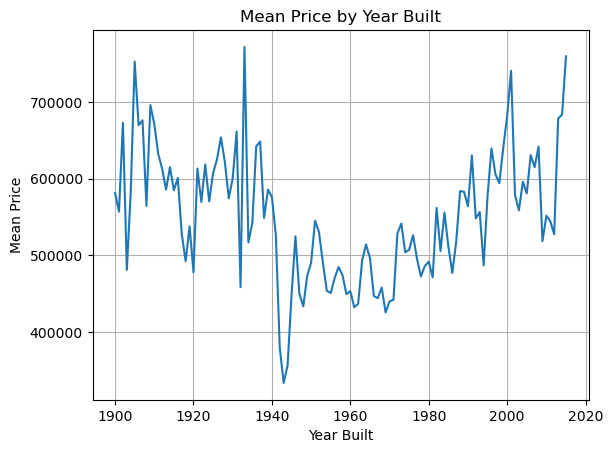

In [118]:
#checking for trends in the average price of homes based on the year they were built
plt.plot(aggregate['yr_built'], aggregate['price'])
plt.title('Mean Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

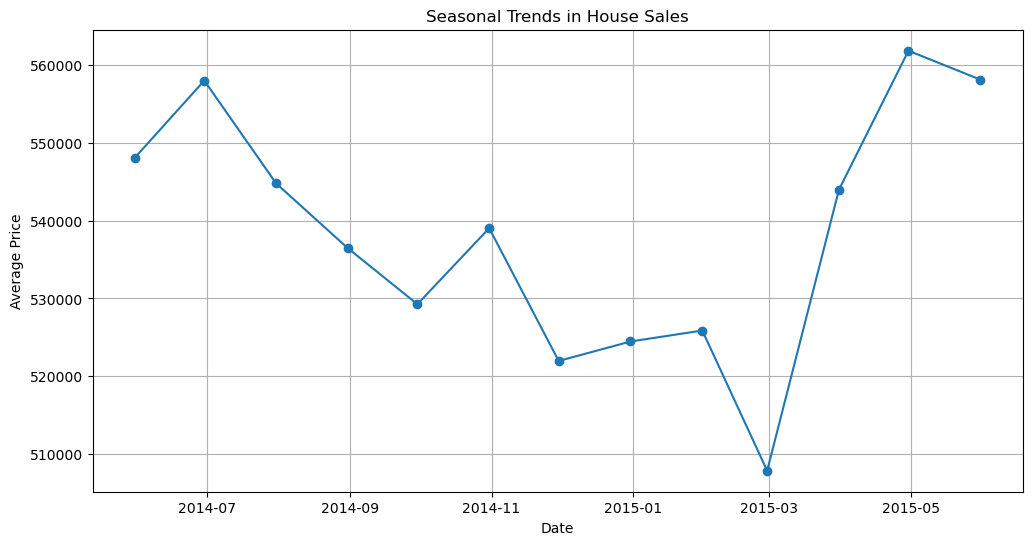

In [119]:
#set the date column as the index
housesales_df.set_index('date', inplace=True)

#resample the data by month and calculate the mean price for each month
monthly_trends = housesales_df['price'].resample('M').mean()

#plot the monthly pattern
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends.index, monthly_trends, marker='o', linestyle='-')
plt.title('Seasonal Trends in House Sales')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

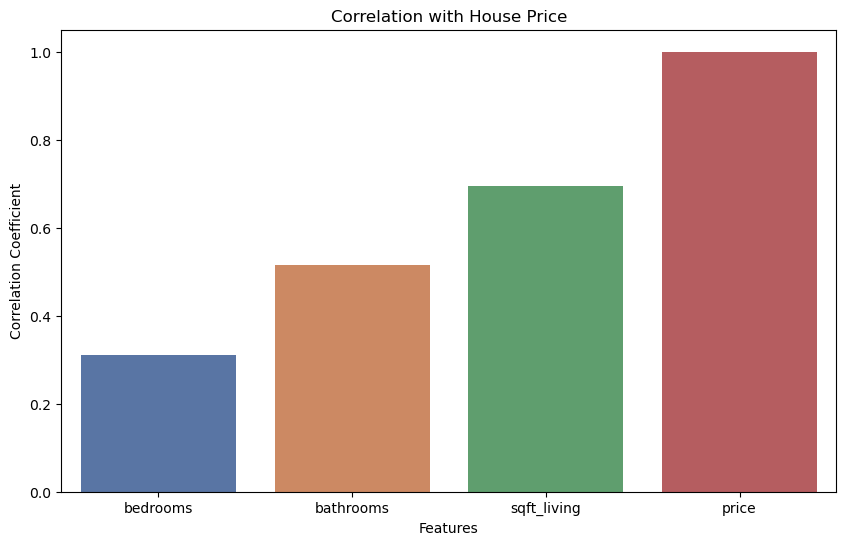

             bedrooms  bathrooms  sqft_living     price
bedrooms     1.000000   0.503259     0.572062  0.310806
bathrooms    0.503259   1.000000     0.726322  0.515786
sqft_living  0.572062   0.726322     1.000000  0.694957
price        0.310806   0.515786     0.694957  1.000000


In [132]:
#correlation matrix and bar chart of bedrooms, bathrooms, and sqft_living in relation to price
correlation = housesales_df[['bedrooms', 'bathrooms', 'sqft_living', 'price']].corr()
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation['price'], palette='deep')
plt.title('Correlation with House Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

#display the correlation coefficients
print(correlation)